In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import sys
sys.path.append("..")  # root path of your project

In [3]:
from agent.graphs.router_graph import router_graph
from agent.graphs.engineer_graph import engineer_graph
from agent.graphs.inspector_graph import inspector_graph

clusters
connect_cluster
kubectl
prometheus


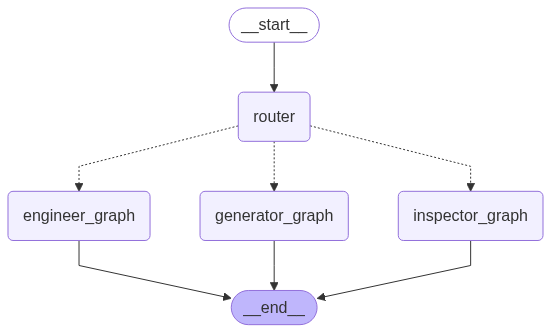

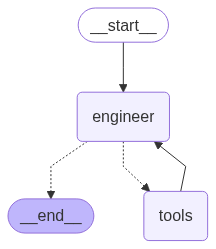

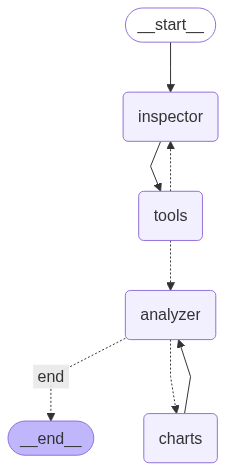

In [4]:
from IPython.display import Image, display
display(Image(router_graph.get_graph().draw_mermaid_png()))
display(Image(engineer_graph.get_graph().draw_mermaid_png()))
display(Image(inspector_graph.get_graph().draw_mermaid_png()))

In [5]:
from langchain_core.messages import HumanMessage

config = {
    "thread_id": "my-thread-id",
}

In [6]:
output = await router_graph.ainvoke({"messages": [
    HumanMessage(content='Get the clusters?')
]}, config)

print(output)

[2025-06-22 12:05:02] [INFO] choose the agent: engineer
[2025-06-22 12:05:02] [INFO] Starting engineer with #messages: 1
[2025-06-22 12:05:03] [INFO] Ending engineer with #message 2
[2025-06-22 12:05:03] [INFO] Staring with tool call: call_4kTnv8ZSiMnQYXSC5hvjcDLk: clusters {}
[2025-06-22 12:05:05] [INFO] Ending with tool call output: call_4kTnv8ZSiMnQYXSC5hvjcDLk: NAME       HUB ACCEPTED   MANAGED CLUSTER URLS                                                            JOINED   AVAILABLE   AGE
cluster1   true           https://api.obs-hub-of-hubs-aws-418-sno-hs7sd.scale.red-chesterfield.com:6443    True     True       1d
cluster2   true           https://api.obs-hub-of-hubs-aws-418-sno-tsphv.scale.red-chesterfield.com:6443    True     True       1d

[2025-06-22 12:05:05] [INFO] Starting engineer with #messages: 3
[2025-06-22 12:05:08] [INFO] Ending engineer with #message 4
============================== Message 1 (HumanMessage) ==============================
content='Get the clusters?'

In [7]:
output = await router_graph.ainvoke({"messages": [
    HumanMessage(content='Get the pods in the open-cluster-management in current hub cluster?')
]}, config)
print(output)

[2025-06-22 12:05:53] [INFO] choose the agent: engineer
[2025-06-22 12:05:53] [INFO] Starting engineer with #messages: 5
[2025-06-22 12:05:55] [INFO] Ending engineer with #message 6
[2025-06-22 12:05:55] [INFO] Staring with tool call: call_mTpsxxpCABqiJXh4kKnJNjhT: kubectl {'command': 'kubectl get pods -n open-cluster-management', 'yaml': '', 'cluster': 'default'}
[2025-06-22 12:05:57] [INFO] Ending with tool call output: call_mTpsxxpCABqiJXh4kKnJNjhT: NAME                                                              READY   STATUS    RESTARTS      AGE
acm-cli-downloads-8c49c56f7-tm7mj                                 1/1     Running   0             17d
cluster-permission-6dcd77f5c7-8df6f                               1/1     Running   0             17d
console-chart-console-v2-7b4bc5f969-v9l4r                         1/1     Running   0             17d
grc-policy-addon-controller-84b64997ff-p75p9                      1/1     Running   0             17d
grc-policy-propagator-8df878f4b-g

In [12]:
output = await graph.ainvoke({"input": "retrieve the memory usage of the pod name with prefix 'multiclusterhub-operator' in the open-cluster-management ns over the past 2 days, using a 5-hour step interval."})
print(output)

[2025-06-21 08:46:37] [INFO] choose the agent: inspector
[2025-06-21 08:46:39] [INFO] tool call input: call_CmrOG3KpqCHfP52njd9njLVd: prometheus {'ql': 'sum(container_memory_usage_bytes{pod=~"multiclusterhub-operator.*",namespace="open-cluster-management"})', 'data_type': 'range', 'start': '2025-06-19T00:46:37Z', 'end': '2025-06-21T00:46:37Z', 'step': '5h'}
[2025-06-21 08:46:42] [INFO] tool call output: call_CmrOG3KpqCHfP52njd9njLVd: {"data":[{"metric":{},"values":[["2025-06-19T00:46:37.000Z",563.88671875],["2025-06-19T05:46:37.000Z",615.3515625],["2025-06-19T10:46:37.000Z",531.5546875],["2025-06-19T15:46:37.000Z",701.08984375],["2025-06-19T20:46:37.000Z",500.8203125],["2025-06-20T01:46:37.000Z",594.93359375],["2025-06-20T06:46:37.000Z",527.66015625],["2025-06-20T11:46:37.000Z",550.82421875],["2025-06-20T16:46:37.000Z",651.91796875],["2025-06-20T21:46:37.000Z",618.30859375]]}],"type":"range","unit":"MiB"}
[2025-06-21 08:46:47] [INFO] [inspector] Output with metrics analysis: analysis="

In [12]:
# Example usage
output = await graph.ainvoke({"input": "How much memory is my cluster using?"})
print(output["output"])

[2025-06-21 08:36:37] [INFO] choose the agent: inspector
[2025-06-21 08:36:39] [INFO] tool call input: call_E811qUHxXHcInZPsEMPDu9gu: prometheus {'ql': 'sum(rate(container_cpu_usage_seconds_total[5m]))', 'data_type': 'snapshot', 'unit': 'cores'}
[2025-06-21 08:36:41] [INFO] tool call output: call_E811qUHxXHcInZPsEMPDu9gu: {"data":[{"pod":"value","value":6.679810649626635}],"type":"snapshot","unit":"cores"}
[2025-06-21 08:36:43] [INFO] [inspector] Output with metrics analysis: analysis='The cluster is utilizing approximately 6.68 CPU cores, showing a consistent rate of CPU usage across the monitored period. This level of usage suggests that the cluster is actively processing workloads but remains within typical operational parameters for a well-managed Kubernetes environment.' content=[RechartData(rechart_data='[{"name":"CPU Usage","value":6.68}]', rechart_type='LineChart', x_axis_key='name', y_axis_keys=['value'], unit='cores', chart_title='Cluster CPU Usage')]
[2025-06-21 08:36:43] [I

In [13]:
output = await graph.ainvoke({"input": "Get the deployment named multiclusterhub-operator in open-cluster-management ns?"})
print(output)

[2025-06-21 09:01:51] [INFO] choose the agent: executor
[2025-06-21 09:01:53] [INFO] tool call input: call_XfPJ1KwamoCe9mWv7x5YPYNy: kubectl {'command': 'kubectl get deployment multiclusterhub-operator -n open-cluster-management', 'yaml': ''}
[2025-06-21 09:01:56] [INFO] tool call output: call_XfPJ1KwamoCe9mWv7x5YPYNy: NAME                       READY   UP-TO-DATE   AVAILABLE   AGE
multiclusterhub-operator   2/2     2            2           22d
{'input': 'Get the deployment named multiclusterhub-operator in open-cluster-management ns?', 'output': 'tool call result'}
